In [0]:
#NLP START
import requests

url = 'https://www.nytimes.com/section/business/economy'

r = requests.get(url)
html = r.text

In [0]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, "html5lib")

In [3]:
import re
text = soup.get_text()

tokens = re.findall('\w+', text)
tokens[:5]

['Economy', 'The', 'New', 'York', 'Times']

In [4]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)
tokens[:10]

['Economy',
 'The',
 'New',
 'York',
 'Times',
 'data',
 'timezone',
 'display',
 'none',
 'css']

In [5]:
words = []

for word in tokens:
    words.append(word.lower())

words[:8]

['economy', 'the', 'new', 'york', 'times', 'data', 'timezone', 'display']

In [6]:
import nltk
nltk.download('stopwords')

sw = nltk.corpus.stopwords.words('english')
sw[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we']

In [0]:
bl = ['unemployment', 'coronavirus', 'stock', 'price', 'boost', 'economy', 'funds', 'sec', 'markets', 'down', 'up', 'bear', 'bull', 'bearish', 'bullish']

In [8]:
words_ns = []
for word in words:
    if word not in sw:
        words_ns.append(word)

words_ns[:5]

['economy', 'new', 'york', 'times', 'data']

In [9]:
words2 = []
for word in words:
    if word in bl:
        words2.append(word)

words2[:5]

['economy', 'economy', 'economy', 'economy', 'coronavirus']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


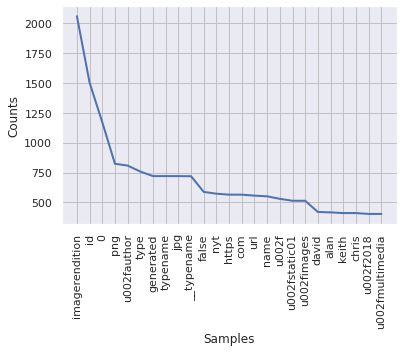

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

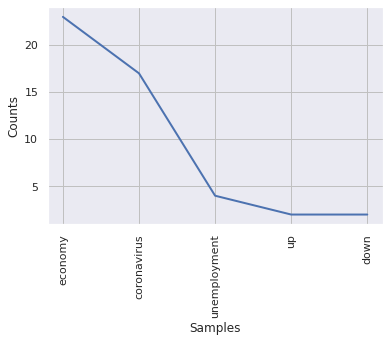

In [11]:
freqdist2 = nltk.FreqDist(words2)
freqdist2.plot(25)

In [12]:
import pandas as pd

stock_terms = words2

df = pd.DataFrame(stock_terms)
df.columns = ['term']
df['term'].value_counts()
df

,term
0,economy
1,economy
2,economy
3,economy
4,coronavirus
5,economy
6,coronavirus
7,coronavirus
8,economy
9,coronavirus


In [0]:
df2 = df['term'].value_counts()

In [0]:
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2 = df2.rename(columns={"index": "terms", "term": "count"})

In [16]:
df2

,terms,count
0,economy,23
1,coronavirus,17
2,unemployment,4
3,up,2
4,down,2


In [0]:
#ML START
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [43]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-05-25


In [44]:
sTc = 'SPY' 
df = web.DataReader(sTc, data_source='yahoo', start='2012-01-01', end=today) 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,108.037117
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,108.206604
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,108.494698
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,108.215065
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,108.477776
...,...,...,...,...,...,...
2020-05-18,296.750000,292.700012,293.049988,295.000000,120320200.0,295.000000
2020-05-19,296.209991,291.950012,294.350006,291.970001,95189300.0,291.970001
2020-05-20,297.869995,295.570007,295.820007,296.929993,85861700.0,296.929993


In [45]:
df.shape

(2111, 6)

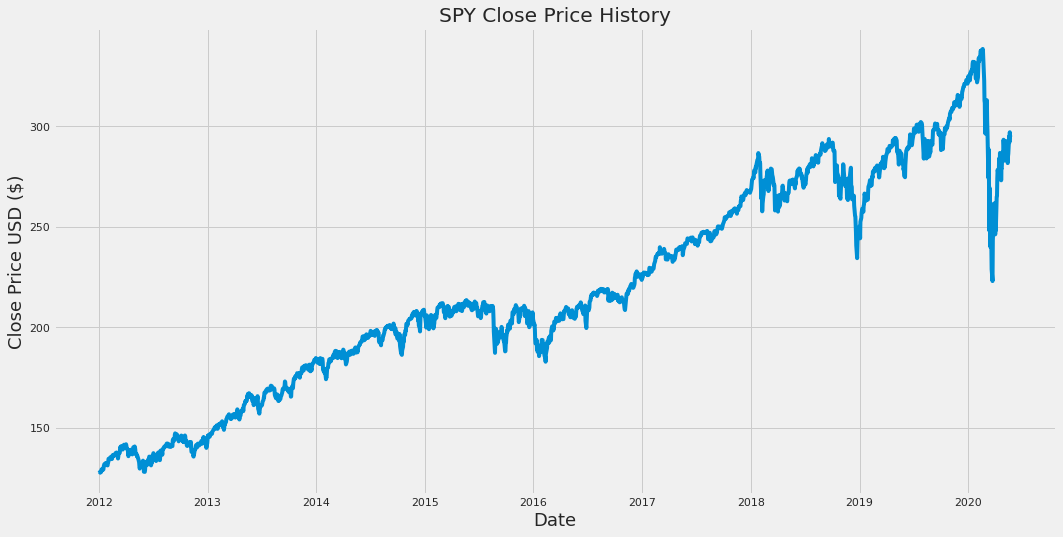

In [46]:
plt.figure(figsize=(16,8))
plt.title(sTc + ' Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [0]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) 

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [0]:
 train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1629/1629 [==============================] - 67s 41ms/step - loss: 8.8627e-04


In [0]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [0]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [58]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

9.884199701159384

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


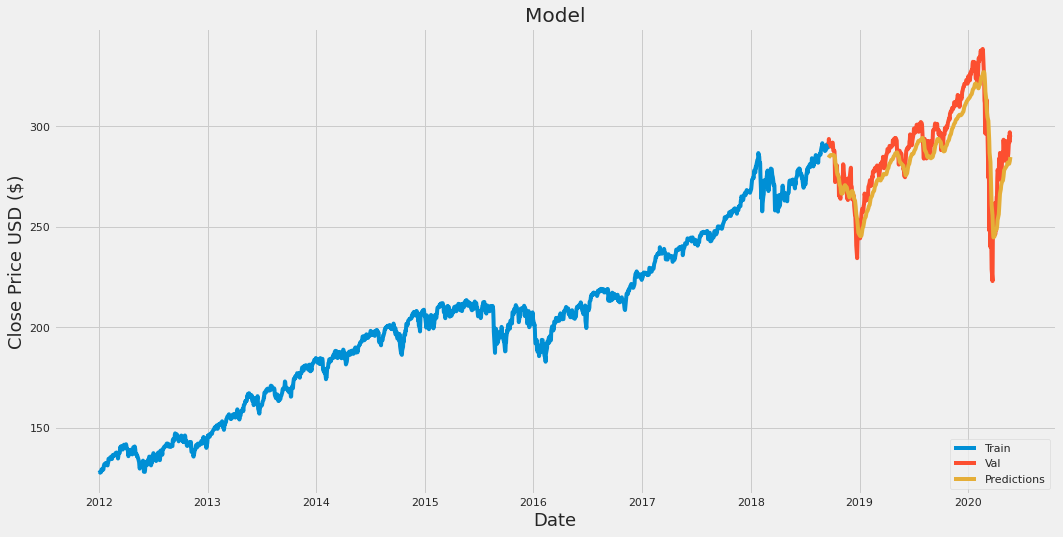

In [59]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [60]:
valid

,Close,Predictions
Date,,
2018-09-19,291.220001,284.262726
2018-09-20,293.579987,284.500183
2018-09-21,291.989990,284.922058
2018-09-24,291.019989,285.275177
2018-09-25,290.750000,285.492371
...,...,...
2020-05-18,295.000000,281.280396
2020-05-19,291.970001,281.866425
2020-05-20,296.929993,282.537933
